机器学习主要分为监督学习、非监督学习两大块（还有强化学习），简单讲，其中输入数据有标签的称之为监督学习（supervised learning），我们可以对数据进行训练、测试；没有标签的称之为非监督学习（unsupervised learning）。常见的监督学习有分类、回归，分类的模型有逻辑回归、朴素贝叶斯、决策树、支持矢量机等，回归模型有线性回归、多项式回归、决策树回归等。下面结合自己的学习经历，谈谈对感知器、支持矢量机的认识，主要参考李航博士《统计机器学习》。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 一、感知器模型（perceptron）

感知器是由美国计算机科学家罗森布拉特（F.Roseblatt）于1957年提出的（参见CSDN[博客](http://blog.163.com/zzz216@yeah/blog/static/16255468420107875552606/)），感知器可谓是最早的人工神经网络、也是支持矢量机的基础。通过对网络权值的训练，可以使感知器对一组输人矢量的响应达到值为-1或1的目标输出，从而实现对输人矢量分类的目的。

首先看一个简单的分类例子，比较熟悉的平面二维图，横坐标为x1，纵坐标为x2，上面有若干个点，通过红蓝两种颜色区分为两个类型，红色的为+1类型，蓝色的为-1类型。假设现在有条直线$3x_2 - 2x_1 - 6 = 0$在这两类点中间，直线上方红色的点$(x_1=3， x_2=5.9)$，代入到直线公式中$3*5.9 - 2*3 - 6 = 5.7>0$，而直线下方蓝色的点$(x_1=5， x_2=4.1)$， 代入到公式中$3*4.1 - 2*5 - 6 = -3.7<0$。实际上直线两侧的点，代入直线解析式中，它们的计算结果符号相反。这样我们可以利用这条直线进行分类，在直线上方的点分为正类、下方的点分为负类，实际上这就是简单的感知器。

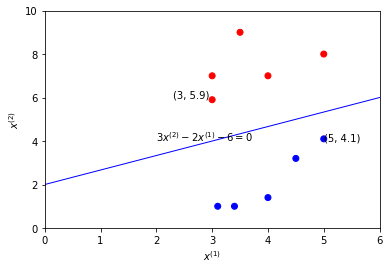

In [6]:
from matplotlib.lines import Line2D
#散点坐标
x1 = [3.0, 3, 3.5, 4, 5, 3.1, 3.4, 4, 4.5, 5]
x2 = [5.9, 7, 9, 7, 8, 1.0, 1, 1.4, 3.2, 4.1]
color = ['r'] * 5 + ['b'] * 5
plt.scatter(x1, x2, c=color)
plt.xlim([0, 6])
plt.ylim([0, 10])
#绘制直线
plt.xlabel('$x^{(1)}$')
plt.ylabel('$x^{(2)}$')
plt.plot([0, 6], [2, 6], linewidth=1, color='blue')
#加标注
plt.text(2, 4, '$3x^{(2)}-2x^{(1)}-6=0$')
plt.text(2.3, 6, '(3, 5.9)')
plt.text(5, 4, '(5, 4.1)')

### 1、感知器定义
学术上所谓感知器，就是二类分类的线性分类模型，其输入为样本的特征向量(如上图，每个样本有两个特征$x^{(1)}，x^{(2)}$，输出为样本的类别，取+1和-1二值，即通过某样本的特征，就可以准确判断该样本属于哪一类（[引用自CSDN博客](http://blog.csdn.net/mutex86/article/details/9159111)）。

用公式表达，由输入空间到输出空间的函数：

$f(x) = sign(wx + b)$，其中sign(x)是符号函数
$$
sign(x) = 
\begin{cases}
  1 \ if \ x>0 \\
  -1 \ if \ x<0
\end{cases}
$$
f(x)称为感知器，w和b为感知机参数，w为权值（weight）向量，b为偏置（bias），sign为符号函数。

假设输入数据x有n个特征属性，每个样本x可以写成向量$(x^{(1)}, x^{(2)},...,x^{(n)})^T$，那么权重w向量为$(w^{(1)}, w^{(2)},...,w^{(n)})$，那么感知器$f(x) = sign(wx + b) = sign(\sum_{i=1}^n{w^{(i)}x^{(i)}} + b)$，任给输入样本x，如果$wx+b>0$，那么输出类别就是+1，如果$wx+b<0$，那么输出类别就是-1。

上图中的感知器$f(x) = sign(wx+b) = sign(3x^{(2)} - 2x^{(1)} - 6)$，当输入样本x=
$(x^{(1)}=3，x^{(2)}=5.9)$，f(x) = sign(5.7) = 1。
 
在上面二维属性基础上，感知器可以引申到多维空间，几何意义上讲，感知器学习目的是在多维空间寻找一个分离超平面S，对应的线性方程为$wx+b=0$，超平面将样本正确划分为正负两类。


![perceptron](pic/perceptron.png)

感知机是早期机器学习模型，也是后面神经网络、支持矢量机等模型基础。

### 2、感知器学习策略

#### 2.1损失函数

感知器的学习目的是找到合适的分类超平面S，具体来讲就是给定样本情况下确定参数w和b？需要确定一个策略，即定义损失函数并将之最小化。损失函数的一个自然选择就是误分类点个数，但是这样的损失函数不是w、b的连续可导函数，难以优化。另一种途径就是将损失函数定义为所有误分点离超平面S距离之和，误分点愈多损失函数越大。

![point_line](pic/point_line.gif)

先回顾下$R^n$空间中任何一点$x$到超平面S（表达式为$wx+b=0$）的距离，距离计算公式：
$$\frac{|wx+b|}{\|w\|}$$

其中$\|w\|$是w的L2范数，也就是权重平方和的平方根。
$\|w\| = \sqrt {(w^{(1)})^2+(w^{(2)})^2+...+(w^{(n)})^2}$。

比如上图点到直线的距离可以写成：

$$\frac {|3x^{(2)}-2x^{(1)}-6|}{\sqrt {3^2 + 2^2}}$$

对于第i条数据$(x_i, y_i)是误分类，意味着wx_i+b>0，y_i=-1或者wx_i+b<0, y_i=1。也就是说
$$y_i(wx_i+b)<0$，所以其绝对值在前面加个负号，误分类点到超平面的距离为：
$$\frac{-y_i(wx_i+b)}{\|w\|}$$

对于给定的N条数据集$(x_1, y_1),(x_2,y_2),...(x_N, y_N)$，所有误分类点到超平面S的距离和则为：
$$\frac{-\sum_{x_i\in M}{y_i(wx_i+b)}}{\|w\|}$$

对于特定的超平面，$\|w\|$为常数，不考虑它，感知器学习的损失函数为：
$$L(w, b) = - \sum_{x_i\in M}{y_i(wx_i+b)}$$

#### 2.2梯度

给定一个训练数据集，学习就要求参数w（矢量）、b（标量（，使得损失函数最小：
$$min  \ L(w, b) = - \sum_{x_i \in M}{y_i(wx_i+b)}$$

我们可以使用梯度下降的方法来寻求最小化损失函数。那么w，b梯度由：

$$\Delta_w L(w, b) = - \sum_{x_i \in M}{y_ix_i}  \ 矢量，长度与w一致 $$

$$\Delta_b L(w, b) = - \sum_{x_i \in. M}{y_i}$$
给出。

#### 2.3训练过程

- 选取初值 $w_0, b_0$
- 随机选取一个误分类点$(x_i, y_i)$
- 对w、b进行更新：
    $$w \leftarrow w + \eta y_ix_i$$
    $$b \leftarrow b + \eta y_i$$
    其中$\eta$是步长（学习率），大于0。
这样通过迭代可以期待损失函数不断减小，直到为0。

可以证明，对于线性可分数据集算法是收敛的，具体参见《统计学习方法》P61。

迭代过程中，$w^{*} = w + \eta y_ix_i$，$b^{*} = b + \eta y_i$，代入到损失函数中，$L(w^{*}, b^{*}) = - \sum_{x_i\in M}{y_i(wx_i + \eta y_i{(x_i)}^2 + b + \eta y_i)} = - \sum_{x_i\in M}{y_i(wx_i + b)} - \eta \sum_{x_i\in M}{((x_i)^2(y_i)^2 + (y_i)^2)} \leq - \sum_{x_i\in M}{y_i(wx_i + b)} = L(w,b)$

也就是说，在训练过程中，损失函数L是单调递减的。

## 二、支持矢量机模型

![svm](pic/svm.jpeg)

感知器的目的在于找到一个线性分类器，也就是一个超平面，能够将正负样本完全正确分开。如上图所示，这样的超平面有无穷个，也就是说有无数个感知器可以满足此条件。支持矢量机的目的是求解能够正确划分训练数据集并且几何间隔最大的分离超平面，这样的分离超平面是唯一的。从图上可以看出，几何间隔最大的超平面意味着以充分大的确信度对训练数据进行分类，也就是说离最近的正负样本点都足够远，对未知的新实例有很好的分类预测能力，泛化性也很好。

关于支持矢量机，CSDN上有一篇详细的博客可供参考，http://blog.csdn.net/v_july_v/article/details/7624837。

### 1、函数间隔&几何间隔

假设超平面的线性方程为$wx+b=0$，那么

函数间隔$\hat \gamma$：

$$\hat \gamma_i = y_i(wx_i + b)$$

注意函数间隔可以随着w，b同比例而变化, 比如$x1+x2+1=0$，$2x1+2x2+2=0$，两个都是同条直线，但是后者的函数间隔是前者的两倍。

前面提到了空间上点到直线、平面的距离，样本空间中每个点$(x_i, y_i)$离超平面距离为$\gamma$：

$$\gamma_i = y_i(wx_i + b)/\|w\|$$


但是几何间隔是不会因为权重、偏置的放缩而变化的。

$$ \hat \gamma_i = \gamma_i * \|w\|$$

对于超平面wx+b=0，给定的N个样本点对应着N个函数距离和几何距离，当然距离都是非负数。

定义样本空间上各点距离最小值为$\gamma = min \ \gamma_i$，那么其他的距离$\gamma_i>=\gamma$，**这个最小距离$\gamma$称为样本数据与超平面的几何间隔，也就是离超平面最近点的距离称之为整个样本点的几何间隔**。

**在数据集线性可分的情况下，距离分离超平面最近的点称之为支持矢量，它们的位置对几何间隔影响比较大，它们来决定边界。**。
![supporting vector](pic/supportingvector.jpeg)

### 2、最大间隔分离超平面模型

支持矢量机的目的是求解能够正确划分训练数据集并且几何间隔最大的分离超平面，这可以转化成规划模型来描述。

什么是规划模型？**研究约束条件下目标函数的极值问题的数学理论和方法**，具体内容可以参考数学建模或者运筹学。比如：

$$ 目标：max \ 3x1 + 4x2$$

$$ 约束条件： \ x1 + x2 \leq 5$$

$$ x1 \geq 0，x2 \geq 0 $$


我们之前学习的线性回归模型也可以看出是无约束的规划模型。

$$ min \ \sum_{i=1}^{N}(\hat y_i - y_i)^2/N$$


现在我们要求解的模型就是要使几何间隔$\gamma$最大，最小间隔距离的最大化。

这是一个带约束的最优化问题，具体可以用带约束条件的优化模型表述为：

$$max_{w, b}   \    \gamma$$

$$subject \ to:  \gamma_i \geq \gamma, i=1,2,...,N$$

这个模型还不能直接求解，需要进行一系列的变化，数学的游戏。

### 3、几何间隔最大化规划模型

我们把距离的公式代入，规划模型表达式可以写成：

$$max_{w, b}   \    \gamma$$

$$s.t. \ \frac {y_i(wx_i+b)}{\|w\|} \geq \gamma$$

优化模型可以改写成：
$$max_{w, b} \ \gamma$$

$$s.t. \ y_i(wx_i + b) \geq \|w\|\gamma$$

用函数间隔$\hat \gamma$代替:
$$max_{w, b} \ \frac {\hat \gamma}{\|w\|}$$

$$s.t. \ y_i(wx_i + b) \geq \hat \gamma, \ i=1,2...,N$$

还可以进一步进行变换，令$w^{*} = w/\hat \gamma, b^{*} = b/\hat \gamma$，则$w = \hat \gamma  w^{*}，b = \hat \gamma b^{*}$:

$$max_{w, b} \ \frac {\hat \gamma}{\|\hat \gamma  w^{*}\|}$$

$$s.t. \ y_i(\hat \gamma  w^{*}x_i + \hat \gamma b^{*}) \geq \hat \gamma, \ i=1,2...,N$$

可以：

$$max_{w, b} \ \frac {1}{\|w^{*}\|}$$

$$s.t. \ y_i(w^{*}x_i + b^{*}) \geq 1, \ i=1,2...,N$$

参数w, b按比例改变时不影响最优化问题的解，注意到最大化$\frac {1}{\|w^{*}\|}$和最小化$\frac {\|w^{*}\|^2}{2}$是等价的。 所以最优化问题可以写成：

$$min_{w,b} \ \frac {1}{2}\|w^{*}\|^2$$

$$ s.t. \ y_i(w^{*}x_i + b^{*}) - 1 \geq 0, \ i=1,2...,N$$

这个模型还是有约束条件，不能直接用梯度下降法进行求解。
#### 例子

下面给个例子(引用自《统计机器学习》P102)：
![svm_example](pic/svm_example.png)


例子中样本x是二维矢量，具有两个特征属性，对应的权重w也是二维矢量，假设$w=(w^{(1)}, w^{(2)})$，根据上面最优化模型，最大间隔分离超平面模型：

$$ min_{w,b} \ \frac {1}{2}[(w^{(1)})^2 + (w^{(2)})^2]$$

$$ s.t. \ \ 3w^{(1)} + 3w^{(2)} + b - 1 \geq 0$$
$$ 4w^{(1)} + 3w^{(2)} + b- 1 \geq 0$$
$$ -w^{(1)} - w^{(2)} - b - 1 \geq 0$$

这个规划问题的最优解是$w=(w^{(1)}, w^{(2)}) = (1/2, 1/2)$， $b = -2$，最大间隔分离超平面为$x^{(1)}/2 + x^{(2)}/2 - 2 = 0$。

支持矢量就是x1，x3。

### 3、学习的对偶算法

这是一个凸二次规划问题，因为有约束条件不能直接利用目标函数梯度下降来求解，但是对于凸优化问题有相关的方法进行求解。约束最优化问题模型描述如下：

$$ min_x \ f(x)$$

$$ s.t. \ g_i(x) \leq 0, i=1,2,...k$$

$$      h_i(x) = 0, i=1,2,...,l$$

这类优化问题，如果满足KKT条件（有兴趣可以查看下），可以使用拉格朗日对偶性将原来问题转化成对偶问题，通过解对偶问题得到原始问题的解。为什么要使用对偶方法？一是对偶问题往往更容易求解；二是可以自然引入核函数，进而推广到非线性分类问题。

上述优化模型表达式含有约束条件，不能直接梯度下降求解，我们可以进行转换将目标函数和约束条件放在一个表达式里面，这就是拉格朗日变换。

上述规划模型的拉格朗日函数为：
$$L(x, \alpha, \beta) = f(x) + \sum_{i=1}^{k}\alpha_ic_i(x) + \sum_{j=1}^{l}\beta_jh_j(x)$$

其中$\alpha_i， \beta_j$都是拉格朗日乘子，$\alpha_i>=0$。模型表达简洁了，但是引入了新的变量。

首先构建拉格朗日函数，对每一个不等式引进拉格朗日乘子$\alpha_i>=0，i=1,2,...N$，最大间隔超平面模型可以写成朗格朗日函数：
$$L(w, b, \alpha) = \frac{\|w\|^2}{2} - \sum_{i=1}^{N}\alpha_i(y_i(wx_i + b) - 1)$$

原始问题的对偶问题是极大极小问题：
$$max_{\alpha}min_{w, b} \ L(w, b, \alpha)$$

下面我们尝试求解对偶问题的解。

（1）求$min_{w, b}\ L(w, b, \alpha)$

对拉格朗日函数分别对w， b求导数并令其为0。
$$\Delta_wL(w, b, \alpha) = w - \sum_{i=1}^{N}\alpha_iy_ix_i = 0$$
$$ \Delta_bL(w, b, \alpha) = \sum_{i=1}^{N}\alpha_iy_i = 0$$

得到：
$$w = \sum_{i=1}^{N}\alpha_iy_ix_i$$
$$\sum_{i=1}^{N}\alpha_iy_i = 0$$

将结果代入到拉格朗日函数中(注意$x_i$，$x_j$是矢量)，得到：

$$L(w, b, \alpha) = \frac{\|w\|^2}{2} - \sum_{i=1}^{N}\alpha_i(y_i(wx_i + b) - 1) = ww^T/2 - \sum_{i=1}^{N}\alpha_i(y_i(wx_i + b) - 1)$$

$$L(w, b, \alpha) =  \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i\alpha_jy_iy_j(x_i \cdot x_j)/2 - \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i\alpha_jy_iy_j(x_i \cdot x_j) + b\sum_{i=1}^{N}\alpha_iy_i + \sum_{i=1}^{N}\alpha_i$$

$$L(w, b, \alpha) = -\sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i\alpha_jy_iy_j(x_i  x_j)/2 + \sum_{i=1}^{N}\alpha_i$$

现在模型的求解是由直接求w，b转化到求解变量$\alpha$上。

(2)求$min_{w, b} \ L(w, b, \alpha)对\alpha$的极大，即是对偶问题：
$$ max_\alpha \ -\sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i\alpha_jy_iy_j(x_i \cdot x_j)/2 + \sum_{i=1}^{N}\alpha_i$$
$$ s.t. \ \sum_{i=1}^{N}\alpha_iy_i = 0$$

$$ \alpha_i \geq 0, i=1,2,...,N$$

目标函数也可以写成相反数的最小值：

$$min_\alpha \  \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i\alpha_jy_iy_j(x_i \cdot x_j)/2 - \sum_{i=1}^{N}\alpha_i$$

$$ s.t. \ \sum_{i=1}^{N}\alpha_iy_i = 0$$

$$ \alpha_i \geq 0, i=1,2,...,N$$

现在规划问题转化成求解$\alpha$从而达到求解w，b。目标函数中$x_i \cdot x_j$就是内积，方便进行非线性变换。这种规划模型可以用SMO（sequential minimal optimization）算法，也是一种迭代的思想，每次固定N-2个$\alpha$变量值，求解剩下的两个。


(3)分类决策函数

假设向量$\alpha = (\alpha_1,\alpha_2,...\alpha_l)^T$是上面对偶问题的解，假设第j个元素$\alpha_j>0$,根据KKT条件有：

$$\alpha_j(y_j(wx_j+b)-1) = 0$$

则：
$$y_j(wx_j+b) - 1 = 0$$
$$y_j^2 = 1$$
$$b = y_j - \sum_{i=1}^{N}{\alpha_iy_i(x_i \cdot x_j)}$$


最后的w，b解为：

$$w = \sum_{i=1}^{N}\alpha_iy_ix_i$$

$$b = y_j - \sum_{i=1}^{N}\alpha_iy_i(x_i \cdot x_j)$$


分类决策函数可以写成：

$$f(x) = sign(wx+b) = sign(\sum_{i=1}^{N}\alpha_iy_i(x \cdot x_i) + b)$$

也就是说分类决策函数取决于输入x和训练样本的内积。



实际上，当$\alpha_i>0$时，意味着对应的点在边界上，也就是所谓的支持矢量。当$\alpha_i=0$时，则对应着非支持矢量。最终的决策函数里面的内积可以只计算输入x与支持矢量的内积，相当于简化了计算。

$$f(x) = sign(\sum_{i \in SVs}\alpha_iy_i(x \cdot x_i) + b)$$

#### 例子

训练数据集跟第3部分例子相同，正例点为$x_1=(3, 3)^T, x_2 = (4, 3)^T$，负例点是$x_3 = (1, 1)^T$，求线性可分支持矢量机。

$$ min_\alpha \ \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i\alpha_jy_iy_j(x_i \cdot x_j)/2 - \sum_{i=1}^{N}\alpha_i$$
$$ s.t. \ \sum_{i=1}^{N}\alpha_iy_i = 0$$

$$ \alpha_i \geq 0, i=1,2,...,N$$

在本例中，N=3。先计算几个内积，$x_1 \cdot x_2 = 21, \ x_1 \cdot x_3 = 6, \  x_2 \cdot x_3 = 7, \ x_1 \cdot x_1 = 18, \ x_2 \cdot x_2 =25, \ x_3 \cdot x_3 = 2$。代入到上面的规划模型中：

$$ min_{\alpha} \ (18\alpha_1^2 + 42\alpha_1\alpha^2 - 12\alpha_1\alpha_3 + 25\alpha_2^2 - 14\alpha_2\alpha_3 + 2\alpha_3^2)/2 - \alpha_1 - \alpha_2 - \alpha_3$$

约束条件：
$$ \alpha_1 + \alpha_2 - \alpha_3 = 0$$
$$ \alpha_i \geq 0, i=1,2, 3$$

将$\alpha_3 = \alpha_1 + \alpha_2$代入目标函数得：

$$s(\alpha_1, \alpha_2) = 4\alpha_1^2 + 13\alpha_2^2/2 + 10\alpha_1\alpha_2 - 2\alpha_1- 2\alpha_2$$

最后的求解结果是$\alpha_1 = \alpha_3 = 1/4, \ \alpha_2 = 0$，

$$w = \sum_{i=1}^{N}\alpha_iy_ix_i = (3, 3)^T/4 + 0 - (1, 1)^T/4 = (1/2, 1/2)^T$$

$$b = y_1 - \sum_{i=1}^{N}\alpha_iy_i(x_i \cdot x_1) = 1 - 18/4 + 6/4 = -2$$


$w_1 = w_2 = 1/2, b = -2$。分类决策函数为：

$$f(x) = sign(wx+b) = sign(\sum_{i=1}^{N}\alpha_iy_i(x \cdot x_i) + b) = sign(x^{(1)}/2 + x^{(2)}/2 - 2)$$

### 4、数据集非线性可分的处理

以上的模型都是基于训练集线性可分，现实中训练数据集往往是不可分的，即在样本中存在噪声和异常点，怎么样将上述线性可分的模型拓展到不可分的数据集，也就是上述规划模型中的不等式如果不成立怎么办？这里需要修改硬间隔最大化，使其成为软间隔最大化。
我们可以将那些不可分的点看作是特异点（outlier），将这些点除去后剩下的样本点就是线性可分。
![outlier](pic/slack.jpg)

在模型上，为了解决这个问题，我们可以对每个样本点$(x_i, y_i)$ 引入松弛变量$\epsilon_i>=0$，使函数间隔加上松弛变量大于等于1。经过计算后，当该点被正确分类且在支持矢量内侧时，$\epsilon_i = 0$；当该点被正确分类但是处在间隔边界和分离超平面之间时，$\epsilon_i$在0，1之间；当$\epsilon_i>1$时，意味着该点被错分。引入松弛变量后的最优化模型表达如下：

$$ min_{w, b, \epsilon} \ \frac{\|w\|^2}{2} + C\sum_{i=1}^{N}\epsilon_i $$

$$ s.t. y_i(wx_i + b) \geq 1 - \epsilon_i, i=1,2...,N$$

$$ \epsilon_i \geq 0, i=1,2,...,N$$

上述模型也是二次凸优化模型，C是松弛变量的惩罚因子。类似地也可以使用拉格朗日变换，使用对偶算法进行求解，不过求解变量中多了$\epsilon$和$\mu$变量。
$$拉格朗日函数：L(w, b, \epsilon, \alpha, \mu) = \frac{\|w\|^2}{2} + C\sum_{i=1}^{N}\epsilon_i - \sum_{i=1}^{N}\alpha_i(y_i(wx_i+b)-1+\epsilon_i) - \sum_{i=1}^{N}\mu_i\epsilon_i$$

$$ \alpha_i \geq 0, \mu_i \geq 0, \ i=1,2...,N$$

对偶问题是拉格朗日函数的最大最小问题。分别对$w, b, \epsilon$求导。

$$w = \sum_{i=1}^{N}\alpha_iy_ix_i$$
$$\sum_{i=1}^{N}\alpha_iy_i = 0$$
$$C - \alpha_i - \mu_i = 0$$

对偶问题：
$$min_\alpha \ \sum_{i=1}^{N}\sum_{j=1}^{N}\alpha_i\alpha_jy_iy_j(x_i \cdot x_j)/2 - \sum_{i=1}^{N}\alpha_i$$

$$ s.t. \ \sum_{i=1}^{N}\alpha_iy_i = 0$$

$$ 0 \leq \alpha_i\leq C, i=1,2,...,N$$


可见带有异常点的对偶问题与线性可分情况下的对偶问题非常类似，只是在约束条件里面多了个上限C。

假设向量$\alpha = (\alpha_1,\alpha_2,...\alpha_l)^T$是上面对偶问题的解，假设第j个分量$0<\alpha_j<C$，则：

$$w = \sum_{i=1}^{N}\alpha_iy_ix_i$$

$$b = y_j - \sum_{i=1}^{N}\alpha_iy_i(x_i \cdot x_j)$$

可以看出在形式上与线性可分模型一致，分类决策函数可以写成：

$$f(x) = sign(wx+b) = sign(\sum_{i=1}^{N}\alpha_iy_i(x \cdot x_i) + b)$$

$x_i，x_j$分别是第i，j个样本特征属性向量，它们的内积为$x_i^Tx_j$。

### 5、核技巧

上面谈论的都是线性条件下的分类，有时候分类问题是非线性的，无法直接用线性模型将正负实例分开，但是如果能用$R^n$中的一个超曲面将正负类正确分开，则称这个问题为非线性可分问题，如下图左边的例子，可以用椭圆曲线将正负点正确分开：
![curve](pic/curves.png)

非线性问题往往不好求解，所以希望能用线性分类问题的方法解决。所采取的方法是进行非线性变换，将非线性问题转化成线性问题，然后用上面的线性模型进行求解。假设上面左图中的样本属性空间为x，有两个特征属性$x1，x2$，空间中的椭圆曲线为：
$$w^{(1)}(x^{(1)})^2 + w^{(2)}(x^{(2)})^2 + b = 0$$

现在假设新的样本空间为z，特征属性为$z^{(1)}, z^{(2)}$，原空间到新空间的变换为：

$$ z = \phi(x) = ((x^{(1)})^2, (x^{(2)})^2) $$

$$ z^{(1)} = (x^{(1)})^2, \ z^{(2)} = (x^{(2)})^2 $$

原来的椭圆曲线可以变成新的空间里面的直线：

$$ w^{(1)}z^{(1)} + w^{(2)}z^{(2)} + b = 0$$
或者写成：
$$ wz + b =0$$

通常我们将核函数写成：
$$K(x_i, x) = \phi(x_i) \cdot \phi(x)$$

分类决策函数式称为：

$$f(x) = sign(\sum_{i=1}^{N}\alpha_iy_i\phi(x_i) \cdot \phi(x) + b) = sign(\sum_{i=1}^{N}\alpha_iy_iK(x_i, x) + b)$$

上面的椭圆转换后的分类器为：

$$z_i = (z_i^{(1)}, z_i^{(2)}) = ((x_i^{(1)})^2, (x_i^{(2)})^2)$$

$$z_i \cdot z = (x_i^{(1)})^2 * (x^{(1)})^2 + (x_i^{(2)})^2 * (x^{(2)})^2$$

$$f(x) = sign(\sum_{i=1}^{N}\alpha_iy_i(z_i \cdot z) + b)$$

常用的核函数：

（1）线性和函数

$$f(x) = sign(\sum_{i=1}^{N}\alpha_iy_i(x_i \cdot x) + b)$$

（2）多项式核函数
$$ K(x, z) = (x \cdot z + 1)^p$$
$$f(x) = sign(\sum_{i=1}^{N}\alpha_iy_i(x_i \cdot x + 1)^p + b)$$

（3）高斯核函数
$$ K(x, z) = exp(- \frac {\|x - z\|^2}{2\sigma^2})$$
$$f(x) = sign(\sum_{i=1}^{N}\alpha_iy_iexp(- \frac {\|x - x_i\|^2}{2\sigma^2}) + b)$$

实际应用中，往往依赖领域知识直接选取核函数，不需要显示定义特征空间和映射函数，核函数选择有效性需要通过实验验证。

### 5、示例

下面是Sklearn官方文档上的一个示例，具体参见[SVM练习](http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py)。

In [8]:
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

In [9]:
clf = svm.SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:

#加载鸢尾花数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

#选择两类数据
#只选取前面两个特征，方便平面显示
X = X[y != 0, :2]
y = y[y != 0]


#划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


#plt.show()

In [16]:
def svmPlot(C):
    # 用三种核进行分类
  for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(C=C, kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)
    
    print('Accuracy:', np.mean(clf.predict(X_test) == y_test))

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # 圈出测试数据
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    plt.axis('tight')
    #坐标范围
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    #到超平面的距离
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # 画图
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    #等高线
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '-.'],
                levels=[-.5, 0, .5])

    plt.title(kernel)
    plt.show()

####################
Accuracy: 0.666666666667


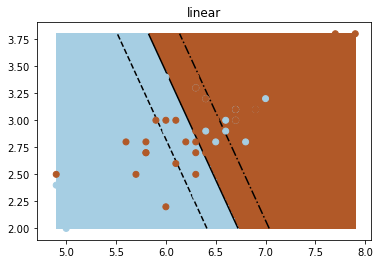

Accuracy: 0.566666666667


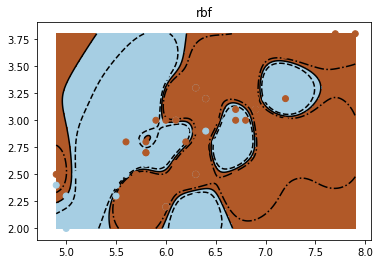

Accuracy: 0.666666666667


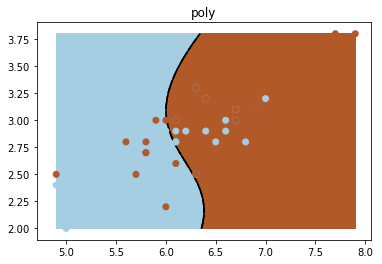

####################
Accuracy: 0.633333333333


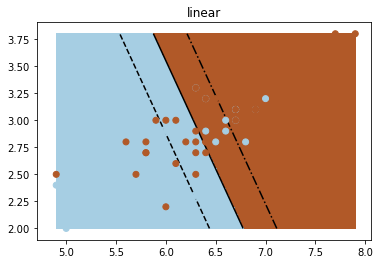

Accuracy: 0.6


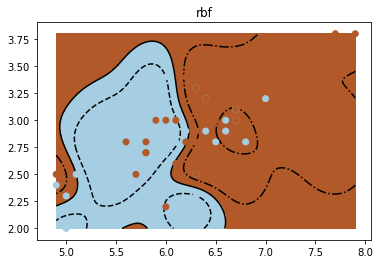

Accuracy: 0.633333333333


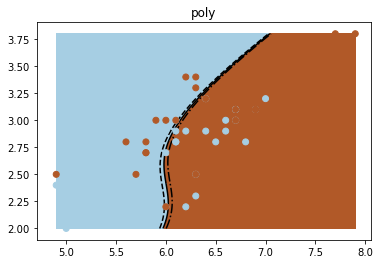

In [17]:
Cs = [100, 1]
for C in Cs:
    print('#'*20)
    svmPlot(C)

## 参考文献：

- 《统计学习方法》，李航
- 支持向量机通俗导论（理解SVM的三层境界），http://blog.csdn.net/macyang/article/details/38782399/
- 支持矢量机数学原理，http://blog.csdn.net/v_july_v/article/details/7624837
- 怎么样理解SVM？，https://www.zhihu.com/question/21094489
- 神经网络入门， http://neuralnetworksanddeeplearning.com/chap1.html
- 神经网络，斯坦福，http://ufldl.stanford.edu/wiki/index.php/%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C
- 神经网络，多伦多大学，https://www.coursera.org/learn/neural-networks/